In [2]:
!pip3 install ktrain

In [3]:
!pip3 install spacy==2.3.7

# !python -m spacy download en_core_web_lg
# !python -m spacy download en_core_web_sm
# !python -m spacy download en

In [4]:
!pip3 install tensorflow

  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
ERROR: black 21.12b0 has requirement typing-extensions>=3.10.0.0, but you'll have typing-extensions 3.7.4.3 which is incompatible.
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.0.1
    Uninstalling typing-extensions-4.0.1:
      Successfully uninstalled typing-extensions-4.0.1


In [5]:
!pip3 install wordcloud

     |████████████████████████████████| 371 kB 1.5 MB/s eta 0:00:01


In [6]:
!pip3 install numpy

In [7]:
# import required module
import os
import pandas as pd
import numpy as np
import re
import spacy
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from spacy.lang.en.stop_words import STOP_WORDS

In [28]:
file1 = open(r"/mnt/c/Users/1672886/Desktop/NLP_Text_Analysis/bbc/business/001.txt","r")
#file1.read()

In [29]:
# assign directory
business_directory = r'/mnt/c/Users/1672886/Desktop/NLP_Text_Analysis/bbc/business'
entertainment_directory = r'/mnt/c/Users/1672886/Desktop/NLP_Text_Analysis/bbc/entertainment'
politics_directory = r'/mnt/c/Users/1672886/Desktop/NLP_Text_Analysis/bbc/politics'
sport_directory = r'/mnt/c/Users/1672886/Desktop/NLP_Text_Analysis/bbc/sport'
tech_directory = r'/mnt/c/Users/1672886/Desktop/NLP_Text_Analysis/bbc/tech'

In [30]:
print( 'Business_Directory :' + str(len(os.listdir(business_directory))) + '\n' + 
'entertainment_directory :' + str(len(os.listdir(entertainment_directory))) + '\n' +
'politics_directory :' + str(len(os.listdir(politics_directory))) + '\n' +
'sport_directory :' + str(len(os.listdir(sport_directory))) + '\n' +
'tech_directory :' + str(len(os.listdir(tech_directory))) )

Business_Directory :510
entertainment_directory :386
politics_directory :417
sport_directory :511
tech_directory :401


In [31]:
Training_Data = pd.DataFrame( columns= ['Text_Content', 'Label', 'File_Path', 'File_Name' ] )    

# iterate over files in a business directory
for filename in os.listdir(business_directory):
    f = os.path.join(business_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        open_file = open(f,'r')
        read_content = open_file.read()
        Training_Data = Training_Data.append({'Text_Content': read_content, 'Label': 'Business', 'File_Path': f, 'File_Name': filename}, ignore_index= True)       

In [32]:
# iterate over files in a entertainment_directory directory
for filename in os.listdir(entertainment_directory):
    f = os.path.join(entertainment_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        open_file = open(f,'r')
        read_content = open_file.read()
        Training_Data = Training_Data.append({'Text_Content': read_content, 'Label': 'Entertainment', 'File_Path': f, 'File_Name': filename}, ignore_index= True)  

In [33]:
# iterate over files in a politics_directory directory
for filename in os.listdir(politics_directory):
    f = os.path.join(politics_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        open_file = open(f,'r')
        read_content = open_file.read()
        Training_Data = Training_Data.append({'Text_Content': read_content, 'Label': 'Politics', 'File_Path': f, 'File_Name': filename}, ignore_index= True)  

In [34]:
# iterate over files in a sport_directory directory
for filename in os.listdir(sport_directory):
    f = os.path.join(sport_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        open_file = open(f,mode='r',encoding='unicode_escape')
        read_content = open_file.read()
        Training_Data = Training_Data.append({'Text_Content': read_content, 'Label': 'Sports', 'File_Path': f, 'File_Name': filename}, ignore_index= True)   

In [35]:
# iterate over files in a tech_directory directory
for filename in os.listdir(tech_directory):
    f = os.path.join(tech_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        open_file = open(f,'r')
        read_content = open_file.read()
        Training_Data = Training_Data.append({'Text_Content': read_content, 'Label': 'Tech', 'File_Path': f, 'File_Name': filename}, ignore_index= True)  

In [36]:
Training_Data.reset_index(drop=True, inplace=True)
Training_Data['Label'].value_counts()

Sports           511
Business         510
Politics         417
Tech             401
Entertainment    386
Name: Label, dtype: int64

In [37]:
Training_Data['Text_Content']=Training_Data['Text_Content'].str.replace('\n|_|:|/|[|]',' ').map(lambda x:str(x).lower().strip()).map(lambda x: re.sub(r'[^a-z ]','',x)).map(lambda x: re.sub(r' +',' ',x))
# Delete everything between the brackets
Training_Data['Text_Content']=Training_Data['Text_Content'].str.replace(r"\(.*\)","")

Training_Data['Char_Count']= Training_Data['Text_Content'].str.len()
Training_Data['word_Count'] = [len(x.split()) for x in Training_Data['Text_Content'].tolist()]

# Training_Data.drop('words', axis=1, inplace=True)

/tmp/ipykernel_1654/2672935474.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Training_Data['Text_Content']=Training_Data['Text_Content'].str.replace('\n|_|:|/|[|]',' ').map(lambda x:str(x).lower().strip()).map(lambda x: re.sub(r'[^a-z ]','',x)).map(lambda x: re.sub(r' +',' ',x))
/tmp/ipykernel_1654/2672935474.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  Training_Data['Text_Content']=Training_Data['Text_Content'].str.replace(r"\(.*\)","")


In [38]:
# Data validation
Training_Data[Training_Data['Text_Content'].isnull()]
Training_Data['word_Count'].max()
Training_Data['word_Count'].min()
len(Training_Data)

2225

In [39]:
# load english language model
# nlp = spacy.load('en_core_web_sm',disable=['ner','textcat'])
# nlp.max_length = 1151700 # Politics : 1080408 & Tech : 1151608

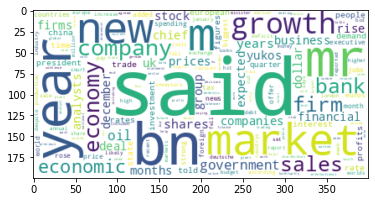

In [40]:
# Choose Sentences 
df = Training_Data[Training_Data['Label']  == 'Business']

# Add words to an array
words = ''
for i in df.Text_Content.values:
    text = ' '.join(word for word in i.split() if word not in STOP_WORDS) # remove stopwors from text
    words += ' '+ text

# create spacy for informatin extraction
# #doc = nlp(words)
# pos_words= ''
#for token in doc:
#    if token.pos_ in ['NOUN','VERB','PROPN']:
#        pos_words += ' '+ token.text

# Create a pandas dataframe with the word and its frequency
wd = pd.DataFrame(Counter(words.split()).most_common(200), columns=['word', 'frequency'])

# Convert the dataframe to a dictionary
data = dict(zip(wd['word'].tolist(), wd['frequency'].tolist()))

wc = WordCloud(background_color='white',
               stopwords=STOPWORDS,
               max_words=200).generate_from_frequencies(data)
plt.imshow(wc, interpolation='bilinear')
plt.show()

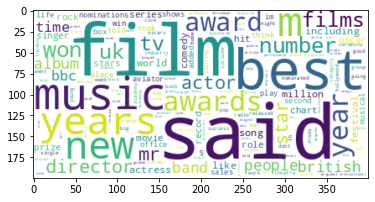

In [41]:
# Choose Sentences 
df = Training_Data[Training_Data['Label']  == 'Entertainment']

# Add words to an array
words = ''
for i in df.Text_Content.values:
    text = ' '.join(word for word in i.split() if word not in STOP_WORDS) # remove stopwors from text
    words += ' '+ text

# Create a pandas dataframe with the word and its frequency
wd = pd.DataFrame(Counter(words.split()).most_common(200), columns=['word', 'frequency'])

# Convert the dataframe to a dictionary
data = dict(zip(wd['word'].tolist(), wd['frequency'].tolist()))

wc = WordCloud(background_color='white',
               stopwords=STOPWORDS,
               max_words=200).generate_from_frequencies(data)
plt.imshow(wc, interpolation='bilinear')
plt.show()

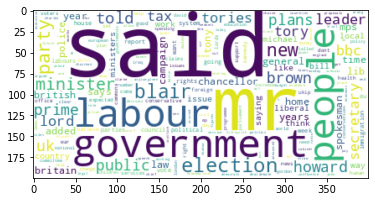

In [42]:
# Choose Sentences 
df = Training_Data[Training_Data['Label']  == 'Politics']

# Add words to an array
words = ''
for i in df.Text_Content.values:
    text = ' '.join(word for word in i.split() if word not in STOP_WORDS) # remove stopwors from text
    words += ' '+ text

# Create a pandas dataframe with the word and its frequency
wd = pd.DataFrame(Counter(words.split()).most_common(200), columns=['word', 'frequency'])

# Convert the dataframe to a dictionary
data = dict(zip(wd['word'].tolist(), wd['frequency'].tolist()))

wc = WordCloud(background_color='white',
               stopwords=STOPWORDS,
               max_words=200).generate_from_frequencies(data)
plt.imshow(wc, interpolation='bilinear')
plt.show()

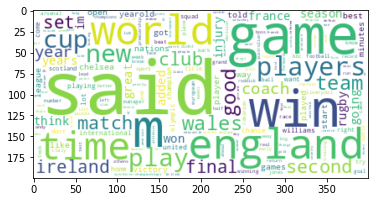

In [43]:
# Choose Sentences 
df = Training_Data[Training_Data['Label']  == 'Sports']

# Add words to an array
words = ''
for i in df.Text_Content.values:
    text = ' '.join(word for word in i.split() if word not in STOP_WORDS) # remove stopwors from text
    words += ' '+ text

# Create a pandas dataframe with the word and its frequency
wd = pd.DataFrame(Counter(words.split()).most_common(200), columns=['word', 'frequency'])

# Convert the dataframe to a dictionary
data = dict(zip(wd['word'].tolist(), wd['frequency'].tolist()))

wc = WordCloud(background_color='white',
               stopwords=STOPWORDS,
               max_words=200).generate_from_frequencies(data)
plt.imshow(wc, interpolation='bilinear')
plt.show()

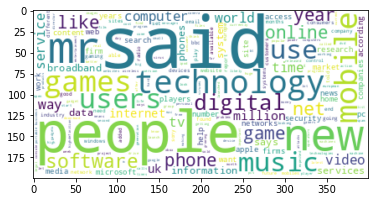

In [44]:

# Choose Sentences 
df = Training_Data[Training_Data['Label']  == 'Tech']

# Add words to an array
words = ''
for i in df.Text_Content.values:
    text = ' '.join(word for word in i.split() if word not in STOP_WORDS) # remove stopwors from text
    words += ' '+ text

# Create a pandas dataframe with the word and its frequency
wd = pd.DataFrame(Counter(words.split()).most_common(200), columns=['word', 'frequency'])

# Convert the dataframe to a dictionary
data = dict(zip(wd['word'].tolist(), wd['frequency'].tolist()))

wc = WordCloud(background_color='white',
               stopwords=STOPWORDS,
               max_words=200).generate_from_frequencies(data)
plt.imshow(wc, interpolation='bilinear')
plt.show()

In [45]:
Training_Data.head()

,Text_Content,Label,File_Path,File_Name,Char_Count,word_Count
0,ad sales boost time warner profit quarterly pr...,Business,/mnt/c/Users/1672886/Desktop/NLP_Text_Analysis...,001.txt,2389,408
1,dollar gains on greenspan speech the dollar ha...,Business,/mnt/c/Users/1672886/Desktop/NLP_Text_Analysis...,002.txt,2173,379
2,yukos unit buyer faces loan claim the owners o...,Business,/mnt/c/Users/1672886/Desktop/NLP_Text_Analysis...,003.txt,1497,264
3,high fuel prices hit bas profits british airwa...,Business,/mnt/c/Users/1672886/Desktop/NLP_Text_Analysis...,004.txt,2197,381
4,pernod takeover talk lifts domecq shares in uk...,Business,/mnt/c/Users/1672886/Desktop/NLP_Text_Analysis...,005.txt,1477,257


In [47]:
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split
import random

In [49]:
X_train, X_test, y_train, y_test = train_test_split(list(Training_Data['Text_Content']), Training_Data['Label'].to_numpy(), random_state = 0)
print (y_train.shape,y_test.shape)

(1668,) (557,)


In [51]:
MODEL_NAME = '/mnt/c/users/1672886/Desktop/distilbert-base-uncased'
from ktrain import text
t = text.Transformer(MODEL_NAME, maxlen=500, classes=list(Training_Data['Label'].unique()))

trn = t.preprocess_train(X_train,y_train)

val = t.preprocess_test(X_test, y_test)

model = t.get_classifier()


/usr/local/lib/python3.8/dist-packages/ktrain/text/preprocessor.py:420: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: en
train sequence lengths:
	mean : 377
	95percentile : 724
	99percentile : 1006


/usr/local/lib/python3.8/dist-packages/ktrain/utils.py:600: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 376
	95percentile : 725
	99percentile : 919


2022-01-19 16:10:13.911755: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-19 16:10:13.915009: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-19 16:10:13.915189: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (01HW1678090): /proc/driver/nvidia/version does not exist
2022-01-19 16:10:13.925821: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-19 16:10:14.254758: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, 

In [52]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

simulating training for different learning rates... this may take a few moments...
Epoch 1/2


2022-01-19 16:11:35.885913: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


208/208 [==============================] - 5582s 27s/step - loss: 1.2238 - accuracy: 0.5024
Epoch 2/2
208/208 [==============================] - 3913s 19s/step - loss: 9.3932 - accuracy: 0.2327


done.
Visually inspect loss plot and select learning rate associated with falling loss


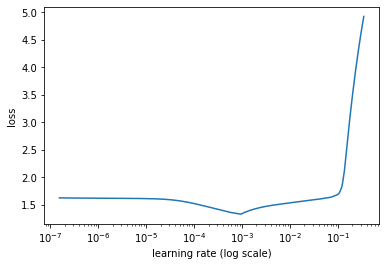

In [54]:
learner.lr_find(show_plot=True, max_epochs=2)